<a href="https://colab.research.google.com/github/dtee1/ELG5255-Applied-Machine-Learning/blob/dev/Assignment_2/Assigment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Subplot
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import warnings

In [ ]:
# Load the DUMD test and train dataset 
def loadDataset(): 
  dataset = pd.read_csv("Assignment2_dataset.csv")
  return dataset

In [ ]:
# This function prepares the test and train dataset 
# 75% of the dataset is used for training and 25% is used for testing 
def prepareDataset(feature,result):
  dataset = loadDataset()
  x = dataset[feature]
  y = dataset[result]
  X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=0,train_size=0.75)
  return X_train,X_test,y_train,y_test,dataset

In [ ]:
def plot_tsne(X, y,name):
  tsne = TSNE(n_components=2, random_state=0)
  plt = tsne.fit_transform(X)
  df = pd.DataFrame()
  df["y"] = y
  df["tsne_1"] = plt[:,0]
  df["tsne_2"] = plt[:,1]

  sns.scatterplot(x="tsne_1", y="tsne_2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="2D TSNE plot for " + name)  

**Question 1**

Accuracy of Logistic Regression model: 76.56%
Accuracy of Logistic KNN model: 71.88%


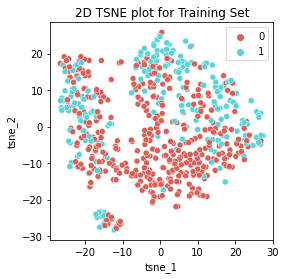

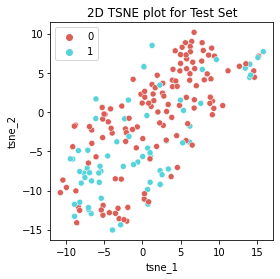

In [ ]:
def main():
  warnings.simplefilter('ignore')
  features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
  result = ['Outcome']
  X_train,X_test,y_train,y_test,dataset = prepareDataset(features,result)
  model_LR = LogisticRegression(random_state=1)
  model_LR.fit(X_train,y_train)
  y_true_LR, y_pred_LR = y_test, model_LR.predict(X_test)
  print('Accuracy of Logistic Regression model: {:.2f}%'.format(accuracy_score(y_test, y_pred_LR) * 100))

  model_KNN = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
  model_KNN.fit(X_train,y_train)
  y_true_KNN, y_pred_KNN = y_test, model_KNN.predict(X_test)
  print('Accuracy of Logistic KNN model: {:.2f}%'.format(accuracy_score(y_test, y_pred_KNN) * 100))
  
  plt.figure(1,figsize=(4,4))
  plot_tsne(X_train, y_train, 'Training Set')
  plt.figure(2,figsize=(4,4))
  plot_tsne(X_test, y_test, 'Test Set')
  
 
if __name__ == '__main__':
  main()